## Principal Component Analysis

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns

In [10]:
df = pd.read_csv('Iris.csv')

In [11]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
label = df['Species']
data = df.drop("Species",axis=1)
data = data.drop("Id",axis=1)

In [16]:
print(data.shape)
print(label.shape)

(150, 4)
(150,)


In [17]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)


(150, 4)


## PCA using SCIKIT-LEARN

In [38]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()


In [39]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(standardized_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)


shape of pca_reduced.shape =  (150, 2)


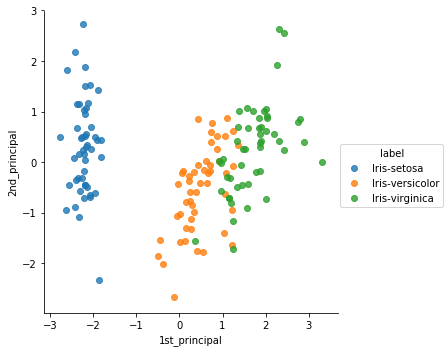

In [40]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, label)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sns.lmplot('1st_principal', '2nd_principal', data=pca_df, hue='label', fit_reg=False)
plt.show()